<a href="https://colab.research.google.com/github/npr99/IN-CORE_notebooks/blob/main/IN_CORE_CommunityDescription_Galveston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Galveston Testbed - Initial Interdependent Community Description

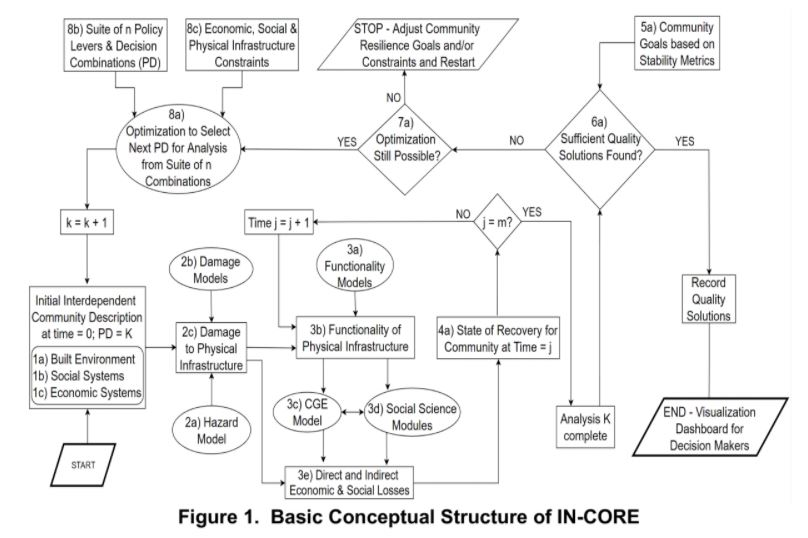

# Basic Conceptual Structure of IN-CORE
Step 1 in IN-CORE is to establish initial interdepent community description at time 0 and with policy levers and decision combinations set to K (baseline case). The community description includes three parts - the built enviroment, social systems, and economic systems. This notebook helps explore the data currently available in IN-CORE for the Galveston Testbed.

Galveston Island is a barrier island located southeast of Houston, TX. The region has been repeatedly impacted by coastal storms and flood hazards, and has a population that is racially and ethnically diverse, with a wide income distribution.

In [1]:
import pandas as pd
import geopandas as gpd # For reading in shapefiles
import numpy as np
import sys # For displaying package versions
import os # For managing directories and file paths if drive is mounted

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage.buildingdamage import BuildingDamage

from pyincore_viz.geoutil import GeoUtil as viz

In [17]:
# Functions for visualizing the population data results as tables
from pyincore_viz.analysis.popresultstable import PopResultsTable as poptable

In [2]:
# Check package versions - good practice for replication
print("Python Version ",sys.version)
print("pandas version: ", pd.__version__)
print("numpy version: ", np.__version__)

Python Version  3.8.13 | packaged by conda-forge | (default, Mar 25 2022, 05:59:45) [MSC v.1929 64 bit (AMD64)]
pandas version:  1.4.2
numpy version:  1.22.3


In [3]:
# Check working directory - good practice for relative path access
os.getcwd()

'c:\\MyProjects\\HRRCProjects\\IN-CORE\\WorkNPR\\github\\IN-CORE_notebooks'

In [4]:
client = IncoreClient()
# IN-CORE chaches files on the local machine, it might be necessary to clear the memory
#client.clear_cache() 

Connection successful to IN-CORE services. pyIncore version detected: 1.4.1


In [5]:
# create data_service object for loading files
data_service = DataService(client)

## 1a) Built enviroment: Building Inventory


In [6]:
# Galveston, TX Building inventory
bldg_inv_id = "63053ddaf5438e1f8c517fed"
# load building inventory
bldg_inv = Dataset.from_data_service(bldg_inv_id, data_service)
filename = bldg_inv.get_file_path('shp')
print("The IN-CORE Dataservice has saved the Building Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Building Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\63053ddaf5438e1f8c517fed\galveston_bldgs_w_guid\galveston_bldgs_w_guid.shp


In [9]:
bldg_inv_gdf = gpd.read_file(filename)

In [8]:
from pyproj import CRS
crs_4326 = CRS('epsg:4326')
bldg_inv_gdf = bldg_inv_gdf.to_crs(crs_4326)
bldg_inv_gdf.head()

,strctid,parid,struct_typ,year_built,no_stories,a_stories,b_stories,bsmt_type,sq_foot,gsq_foot,...,appr_land,appr_tot,guid,ffe_elev,g_elev,archetype,arch_wind,arch_flood,arch_sw,geometry
0,None,0,None,0,1,0,0,0,2574,0,...,0,0,1815653a-7b70-44ce-8544-e975596bdf82,10.50420,10.19940,0,1,1,1,POINT (-95.21749 29.54973)
1,None,0,None,0,1,0,0,0,4280,0,...,0,0,df63f574-8e9b-426b-aa3b-b3757cb699b5,10.45690,10.15210,0,1,1,1,POINT (-95.21780 29.54901)
2,None,0,None,0,1,0,0,0,4504,0,...,0,0,a743ae24-4209-44e2-b11e-7a872f071ae9,10.31060,10.00580,0,1,1,1,POINT (-95.21771 29.54766)
3,None,0,None,0,1,0,0,0,2521,0,...,0,0,59ed0339-c8e3-4fcd-9b5a-c1487b035d3b,9.90699,9.60219,0,1,1,1,POINT (-95.21894 29.54202)
4,None,0,None,0,1,0,0,0,2431,0,...,0,0,5cc8a749-21ca-4073-8626-4ae7332cc0dd,9.90699,9.60219,0,1,1,1,POINT (-95.21891 29.54143)


In [10]:
bldg_inv_gdf.columns

Index(['strctid', 'parid', 'struct_typ', 'year_built', 'no_stories',
       'a_stories', 'b_stories', 'bsmt_type', 'sq_foot', 'gsq_foot',
       'occ_type', 'occ_detail', 'major_occ', 'broad_occ', 'appr_bldg',
       'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl', 'cont_val',
       'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2', 'appr_land',
       'appr_tot', 'guid', 'ffe_elev', 'g_elev', 'archetype', 'arch_wind',
       'arch_flood', 'arch_sw', 'geometry'],
      dtype='object')

In [12]:
bldg_inv_gdf[['guid','strctid','struct_typ','arch_flood']].head()

,guid,strctid,struct_typ,arch_flood
0,1815653a-7b70-44ce-8544-e975596bdf82,None,None,1
1,df63f574-8e9b-426b-aa3b-b3757cb699b5,None,None,1
2,a743ae24-4209-44e2-b11e-7a872f071ae9,None,None,1
3,59ed0339-c8e3-4fcd-9b5a-c1487b035d3b,None,None,1
4,5cc8a749-21ca-4073-8626-4ae7332cc0dd,None,None,1


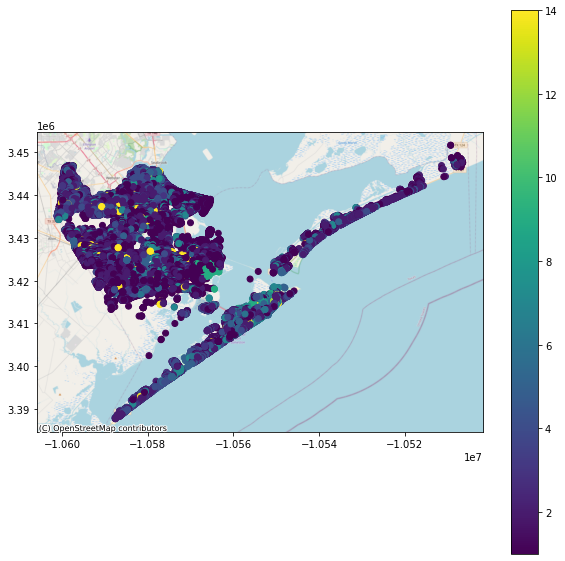

In [13]:
map = viz.plot_gdf_map(bldg_inv_gdf,column='arch_flood')
map

## 1b) Social Systems: Housing Unit Inventory

For more information see:
>Rosenheim, Nathanael, Roberto Guidotti, Paolo Gardoni & Walter Gillis Peacock. (2019). Integration of detailed household and housing unit characteristic data with critical infrastructure for post-hazard resilience modeling. Sustainable and Resilient Infrastructure. doi.org/10.1080/23789689.2019.1681821

>Rosenheim, Nathanael (2021) “Detailed Household and Housing Unit Characteristics: Data and Replication Code.” DesignSafe-CI. https://doi.org/10.17603/ds2-jwf6-s535 v2


In [14]:
# Galveston, TX Housing Unit inventory
housing_unit_inv_id = "626322a7e74a5c2dfb3a72b0"
# load housing unit inventory as pandas dataframe
housing_unit_inv = Dataset.from_data_service(housing_unit_inv_id, data_service)
filename = housing_unit_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Housing Unit Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\626322a7e74a5c2dfb3a72b0\hui_v2-0-0_Galveston_TX_2010_rs1000\hui_v2-0-0_Galveston_TX_2010_rs1000.csv


In [15]:
housing_unit_inv_df = pd.read_csv(filename, header="infer")
housing_unit_inv_df.head()

,huid,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,family,vacancy,gqtype,incomegroup,hhinc,randincome,poverty
0,B481677201001000H001,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,0,0,6,3,31459.0,0.0
1,B481677201001000H002,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,0,0,6,3,34695.0,0.0
2,B481677201001000H003,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,0,0,7,3,38776.0,0.0
3,B481677201001000H004,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,0,0,10,3,52398.0,0.0
4,B481677201001000H005,481677201001000,481677201001,48167720100,48167,1,1.0,1.0,0.0,0.0,0,0,11,3,69564.0,0.0


In [16]:
housing_unit_inv_df.columns

Index(['huid', 'blockid', 'bgid', 'tractid', 'FIPScounty', 'numprec',
       'ownershp', 'race', 'hispan', 'family', 'vacancy', 'gqtype',
       'incomegroup', 'hhinc', 'randincome', 'poverty'],
      dtype='object')

### Explore Housing Unit Characteristics
The housing unit inventory includes characteristics based on the 2010 Decennial Census. 

### Race and Ethnicity
The housing unit inventory includes variables for race and ethnicity.

In [19]:
poptable.pop_results_table(housing_unit_inv_df, 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity",
                  where = "Galveston County TX",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

Tenure Status,1 Owner Occupied (%),2 Renter Occupied (%),Total Population by Householder (%)
Race Ethnicity,,,
"1 White alone, Not Hispanic","137,132 (67.3%)","37,790 (46.2%)","174,922 (61.3%)"
"2 Black alone, Not Hispanic","19,133 (9.4%)","18,286 (22.4%)","37,419 (13.1%)"
"3 American Indian and Alaska Native alone, Not Hispanic",745 (0.4%),360 (0.4%),"1,105 (0.4%)"
"4 Asian alone, Not Hispanic","6,304 (3.1%)","1,717 (2.1%)","8,021 (2.8%)"
"5 Other Race, Not Hispanic","2,000 (1.0%)",931 (1.1%),"2,931 (1.0%)"
"6 Any Race, Hispanic","38,504 (18.9%)","22,633 (27.7%)","61,137 (21.4%)"
Total,"203,818 (100.0%)","81,717 (100.0%)","285,535 (100.0%)"


## 1a + 1b) Interdependent Community Description

Explore building inventory and social systems. Specifically look at how the building inventory connects with the housing unit inventory using the housing unit allocation.
The housing unit allocation method will provide detail demographic characteristics for the community allocated to each structure.

To run the HUA Algorithm, three input datasets are required:

1. Housing Unit Inventory - Based on 2010 US Census Block Level Data

2. Address Point Inventory - A list of all possible residential/business address points in a community. Address points are the link between buildings and housing units.

3. Building Inventory - A list of all buildings within a community.


### Set Up and Run Housing Unit Allocation

The bulding and housing unit inventories have already by loaded. The address point inventory is needed to link the population with the structures.

In [20]:
# Housing unit and Building Inventories have been loaded
# Galveston, TX Address point inventory
address_point_inv_id = "631bb0d4b4f2e17eff72d30d"

In [23]:
# load address point inventory as pandas dataframe
address_point_inv = Dataset.from_data_service(address_point_inv_id, data_service)
filename = address_point_inv.get_file_path('csv')
print("The IN-CORE Dataservice has saved the Address Point Inventory on your local machine: "+filename)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
The IN-CORE Dataservice has saved the Address Point Inventory on your local machine: C:\Users\nathanael99\.incore\cache_data\631bb0d4b4f2e17eff72d30d\addpt_v2-0-0_Galveston_TX_2010_2010_63053ddaf5438e1f8c517fed\addpt_v2-0-0_Galveston_TX_2010_2010_63053ddaf5438e1f8c517fed.csv


In [24]:
address_point_inv_df = pd.read_csv(filename)
address_point_inv_df.head()

,addrptid,guid,strctid,blockid,placeGEOID10,placeNAME10,COUNTYFP10,BLOCKID10_str,building_geometry,block10_geometry,rppnt104269,huestimate,residential,bldgobs,flag_ap,arch_flood,geometry,x,y
0,ST1815653a-7b70-44ce-8544-e975596bdf82AP000000,1815653a-7b70-44ce-8544-e975596bdf82,ST1815653a-7b70-44ce-8544-e975596bdf82,4.816772e+13,4827648.0,Friendswood,167.0,B481677201001000,POINT (-95.21749326252923 29.549727920274638),"POLYGON ((-95.217556 29.549383, -95.2171889999...",POINT (-95.2110716827504 29.554252499999997),1.0,1,1,0,1.0,POINT (-95.21749326252923 29.549727920274638),-95.217493,29.549728
1,ST34d0d761-3d71-4b0f-bc7b-0ddccd509a25AP000000,34d0d761-3d71-4b0f-bc7b-0ddccd509a25,ST34d0d761-3d71-4b0f-bc7b-0ddccd509a25,4.816772e+13,4827648.0,Friendswood,167.0,B481677201001000,POINT (-95.20944229760227 29.558292316626364),"POLYGON ((-95.217556 29.549383, -95.2171889999...",POINT (-95.2110716827504 29.554252499999997),1.0,1,1,0,1.0,POINT (-95.20944229760227 29.558292316626364),-95.209442,29.558292
2,ST68500aae-0ff1-4332-b9c2-1b3c5eeda70dAP000000,68500aae-0ff1-4332-b9c2-1b3c5eeda70d,ST68500aae-0ff1-4332-b9c2-1b3c5eeda70d,4.816772e+13,4827648.0,Friendswood,167.0,B481677201001000,POINT (-95.20864710699996 29.556026922000058),"POLYGON ((-95.217556 29.549383, -95.2171889999...",POINT (-95.2110716827504 29.554252499999997),1.0,1,1,0,1.0,POINT (-95.20864710699996 29.556026922000058),-95.208647,29.556027
3,ST21151b3e-c5b5-4a8d-9e9d-13c77b203a51AP000000,21151b3e-c5b5-4a8d-9e9d-13c77b203a51,ST21151b3e-c5b5-4a8d-9e9d-13c77b203a51,4.816772e+13,4827648.0,Friendswood,167.0,B481677201001000,POINT (-95.20867068436881 29.55600401637477),"POLYGON ((-95.217556 29.549383, -95.2171889999...",POINT (-95.2110716827504 29.554252499999997),1.0,1,1,0,3.0,POINT (-95.20867068436881 29.55600401637477),-95.208671,29.556004
4,ST5691e976-f19c-4bdb-9f9c-9b5da7d8a446AP000000,5691e976-f19c-4bdb-9f9c-9b5da7d8a446,ST5691e976-f19c-4bdb-9f9c-9b5da7d8a446,4.816772e+13,4827648.0,Friendswood,167.0,B481677201001000,POINT (-95.21040175747335 29.554501947929648),"POLYGON ((-95.217556 29.549383, -95.2171889999...",POINT (-95.2110716827504 29.554252499999997),1.0,1,1,0,3.0,POINT (-95.21040175747335 29.554501947929648),-95.210402,29.554502


### Building Inventory Shapefile is missing Structure ID
Structure ID is required to link the address point and building inventories

In [27]:
bldg_inv_gdf['strctid'] = bldg_inv_gdf.apply(lambda x:
    "ST"+ str(x['guid']).zfill(36), axis=1)

In [28]:
bldg_inv_gdf.to_file('galveston_bldgs_w_guid_w_strctid.shp')

c:\Users\nathanael99\Miniconda3\envs\pyincoreEnv20220411\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [38]:
bldg_inv_gdf.head()

,strctid,parid,struct_typ,year_built,no_stories,a_stories,b_stories,bsmt_type,sq_foot,gsq_foot,...,appr_land,appr_tot,guid,ffe_elev,g_elev,archetype,arch_wind,arch_flood,arch_sw,geometry
0,ST1815653a-7b70-44ce-8544-e975596bdf82,0,None,0,1,0,0,0,2574,0,...,0,0,1815653a-7b70-44ce-8544-e975596bdf82,10.50420,10.19940,0,1,1,1,POINT (-95.21749 29.54973)
1,STdf63f574-8e9b-426b-aa3b-b3757cb699b5,0,None,0,1,0,0,0,4280,0,...,0,0,df63f574-8e9b-426b-aa3b-b3757cb699b5,10.45690,10.15210,0,1,1,1,POINT (-95.21780 29.54901)
2,STa743ae24-4209-44e2-b11e-7a872f071ae9,0,None,0,1,0,0,0,4504,0,...,0,0,a743ae24-4209-44e2-b11e-7a872f071ae9,10.31060,10.00580,0,1,1,1,POINT (-95.21771 29.54766)
3,ST59ed0339-c8e3-4fcd-9b5a-c1487b035d3b,0,None,0,1,0,0,0,2521,0,...,0,0,59ed0339-c8e3-4fcd-9b5a-c1487b035d3b,9.90699,9.60219,0,1,1,1,POINT (-95.21894 29.54202)
4,ST5cc8a749-21ca-4073-8626-4ae7332cc0dd,0,None,0,1,0,0,0,2431,0,...,0,0,5cc8a749-21ca-4073-8626-4ae7332cc0dd,9.90699,9.60219,0,1,1,1,POINT (-95.21891 29.54143)


In [44]:
# merge the address point inventory with the building inventory
# using the strctid field
address_point_inv_df_bldg = pd.merge(
    address_point_inv_df, 
    bldg_inv_gdf, on='strctid', how='left')


In [46]:
address_point_inv_df_bldg.strctid.describe()

count                                     210678
unique                                    172648
top       ST6396008f-530a-481c-9757-93f7d58391f9
freq                                         295
Name: strctid, dtype: object

In [30]:
# Temporary Building Inventory v7
building_inv = Dataset.from_file("galveston_bldgs_w_guid_w_strctid.shp", 
            data_type='ergo:buildingInventoryVer7')

In [31]:
from pyincore.analyses.housingunitallocation import HousingUnitAllocation

# Create housing allocation 
hua = HousingUnitAllocation(client)

# Load input dataset
hua.load_remote_input_dataset("housing_unit_inventory", housing_unit_inv_id)
hua.load_remote_input_dataset("address_point_inventory", address_point_inv_id)
# hua.load_remote_input_dataset("buildings", bldg_inv_id)
hua.set_input_dataset("buildings", building_inv)

# Specify the result name
result_name = "Galveston_HUA"

seed = 1238
iterations = 1

# Set analysis parameters
hua.set_parameter("result_name", result_name)
hua.set_parameter("seed", seed)
hua.set_parameter("iterations", iterations)

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...
Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

In [32]:
# Run Housing unit allocation analysis
hua.run_analysis()

True

### Explore results from Housing Unit Allocation

In [39]:
# Retrieve result dataset
hua_result = hua.get_output_dataset("result")

# Convert dataset to Pandas DataFrame
hua_df = hua_result.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
hua_df[['guid','numprec','incomegroup','geometry']].head()

,guid,numprec,incomegroup,geometry
0,NaN,4.0,12.0,NaN
1,NaN,2.0,16.0,NaN
2,NaN,4.0,12.0,NaN
3,NaN,2.0,15.0,NaN
4,NaN,5.0,14.0,NaN


In [34]:
hua_df.columns

Index(['addrptid', 'strctid', 'parid', 'struct_typ', 'year_built',
       'no_stories', 'a_stories', 'b_stories', 'bsmt_type', 'sq_foot',
       'gsq_foot', 'occ_type', 'occ_detail', 'major_occ', 'broad_occ',
       'appr_bldg', 'repl_cst', 'str_cst', 'nstra_cst', 'nstrd_cst', 'dgn_lvl',
       'cont_val', 'efacility', 'dwell_unit', 'str_typ2', 'occ_typ2',
       'appr_land', 'appr_tot', 'ffe_elev', 'g_elev', 'archetype', 'arch_wind',
       'arch_sw', 'blockid', 'placeGEOID10', 'placeNAME10', 'COUNTYFP10',
       'BLOCKID10_str', 'building_geometry', 'block10_geometry', 'rppnt104269',
       'huestimate', 'residential', 'bldgobs', 'flag_ap', 'x', 'y',
       'arch_flood', 'guid', 'randomap', 'randommergeorder', 'huid', 'bgid',
       'tractid', 'FIPScounty', 'numprec', 'ownershp', 'race', 'hispan',
       'family', 'vacancy', 'gqtype', 'incomegroup', 'hhinc', 'randincome',
       'poverty', 'randomhu', 'aphumerge', 'geometry'],
      dtype='object')

In [35]:
# keep observations where the housing unit characteristics have been allocated to a structure.
hua_df = hua_df.loc[hua_df['aphumerge'] == 'both']

In [36]:
poptable.pop_results_table(hua_df.loc[hua_df['placeNAME10']=='Galveston'].copy(), 
                  who = "Total Population by Householder", 
                  what = "by Race, Ethnicity",
                  where = "Galveston TX",
                  when = "2010",
                  row_index = "Race Ethnicity",
                  col_index = 'Tenure Status')

ValueError: No objects to concatenate

In [ ]:
table = pd.pivot_table(hua_df, values='numprec', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc='count').rename(
    columns={'Total': 'Total Households', 'sum': ''})
table_title = "Table 1. Total Households by Race, Ethncity, and Tenure Status, Galveston Island TX, 2010."
varformat = {('Total Households'): "{:,.0f}",
             ('1 Owner Occupied'): "{:,.0f}",
             ('2 Renter Occupied'): "{:,.0f}"}
table.style.set_caption(table_title).format(varformat)

Tenure Status,1 Owner Occupied,2 Renter Occupied,Total Households
Race Ethnicity,,,
"1 White alone, Not Hispanic","6,196","4,716","10,912"
"2 Black alone, Not Hispanic","1,204","2,403","3,607"
"3 Other Race, Not Hispanic",267,515,782
"4 Any Race, Hispanic","2,131","2,399","4,530"
Total,"9,798","10,033","19,831"


In [ ]:
table = pd.pivot_table(hua_df, values='randincome', index=['Race Ethnicity'],
                                     margins = True, margins_name = 'Total',
                                     columns=['Tenure Status'], aggfunc=[np.median]).rename(
    columns={'median': ''})
table_title = "Table 2. Median Household by Race, Ethncity, and Tenure Status, Galveston Island TX, 2010."
varformat = {('','Total'): "${:,.0f}",
             ('','1 Owner Occupied'): "${:,.0f}",
             ('','2 Renter Occupied'): "${:,.0f}"}
table.style.set_caption(table_title).format(varformat)

#### Validate the Housing Unit Allocation has worked
Notice that the population count totals for the community should match (pretty closely) data collected for the 2010 Decennial Census.
This can be confirmed by going to data.census.gov

Total Population by Race and Ethnicity:
https://data.census.gov/cedsci/table?q=DECENNIALPL2010.P5&g=1600000US4828068,4837252&tid=DECENNIALSF12010.P5

Median Income by Race and Ethnicity:
- All Households: https://data.census.gov/cedsci/table?g=1600000US4828068&tid=ACSDT5Y2012.B19013
- Black Households: https://data.census.gov/cedsci/table?g=1600000US4828068&tid=ACSDT5Y2012.B19013B
- White, not Hispanic Households: https://data.census.gov/cedsci/table?g=1600000US4828068&tid=ACSDT5Y2012.B19013H
- Hispanic Households: https://data.census.gov/cedsci/table?g=1600000US4828068&tid=ACSDT5Y2012.B19013I
    
Differences in the housing unit allocation and the Census count may be due to differences between political boundaries and the building inventory. See Rosenheim et al 2019 for more details.

The housing unit allocation, plus the building results will become the input for the social science models such as the population dislocatoin model.

In [ ]:
# Use shapely.wkt loads to convert WKT to GeoSeries
from shapely.geometry import Point
# Geodata frame requires geometry and CRS to be set
hua_gdf = gpd.GeoDataFrame(
    hua_df,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(hua_df['x'], hua_df['y'])])
hua_gdf[['guid','x','y','randincome','geometry']].head(6)

,guid,x,y,randincome,geometry
0,eca98323-d57f-4691-a340-b4e0e19c2346,-94.79152,29.30960,142028.8,POINT (-94.79152 29.30960)
1,eca98323-d57f-4691-a340-b4e0e19c2346,-94.79155,29.30939,325475.7,POINT (-94.79155 29.30939)
2,eca98323-d57f-4691-a340-b4e0e19c2346,-94.79172,29.30958,260189.9,POINT (-94.79172 29.30958)
3,eca98323-d57f-4691-a340-b4e0e19c2346,-94.79238,29.30892,347593.4,POINT (-94.79238 29.30892)
4,eca98323-d57f-4691-a340-b4e0e19c2346,-94.79247,29.30892,558643.5,POINT (-94.79247 29.30892)
5,eca98323-d57f-4691-a340-b4e0e19c2346,-94.79149,29.30942,NaN,POINT (-94.79149 29.30942)


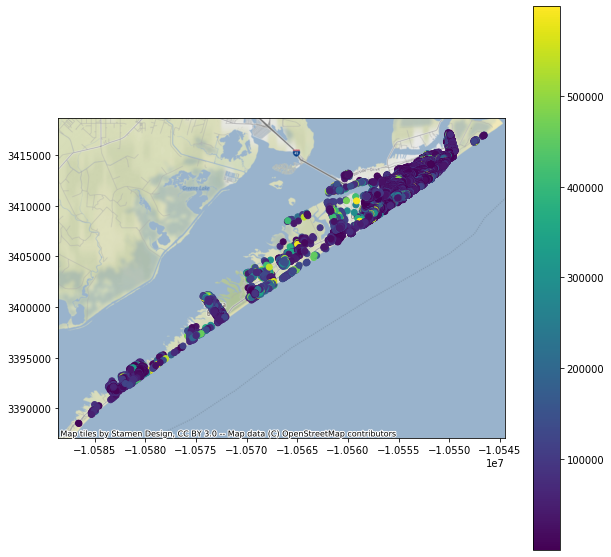

In [ ]:
# visualize population
gdf = hua_gdf
map = viz.plot_gdf_map(gdf,column='randincome')
map

In [ ]:
medianincome = hua_gdf.randincome.median()
medianincome

38746.14

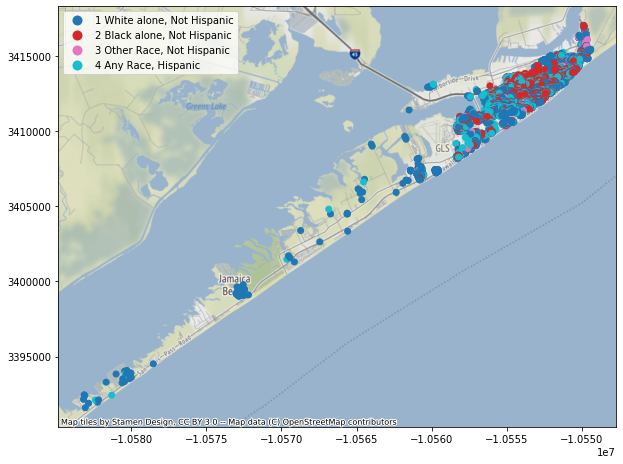

In [ ]:
# visualize population by income and tenure status
lowincome_renters_gdf = hua_gdf.loc[(hua_gdf.randincome < medianincome) &
                                    (hua_gdf['Tenure Status'] == '2 Renter Occupied')]
map = viz.plot_gdf_map(lowincome_renters_gdf,column='Race Ethnicity', category=True)
map

In [ ]:
# What location should the map be centered on?
center_x = hua_gdf.bounds.minx.mean()
center_y = hua_gdf.bounds.miny.mean()
center_x, center_y

(-94.84608266330267, 29.265463355281373)

In [ ]:
# https://ipyleaflet.readthedocs.io/en/latest/api_reference/heatmap.html
import ipyleaflet as ipylft
from ipyleaflet import Map, Heatmap

In [ ]:
print("ipyleaflet Version ",ipylft.__version__)

ipyleaflet Version  0.13.6


In [ ]:
popdata = lowincome_renters_gdf[['y','x','numprec']].values.tolist()

In [ ]:
from ipyleaflet import Map, Heatmap, LayersControl

map = Map(center=[center_y,center_x], zoom=11)

low_income_renters = Heatmap(
    locations = popdata,
    radius = 10, 
    max_val = 1000, 
    blur = 10, 
    gradient={0.2: 'yellow', 0.5: 'orange', 1.0: 'red'},
    name = 'Low Income Renters',
)

map.add_layer(low_income_renters);
control = LayersControl(position='topright')
map.add_control(control)
map

Map(center=[29.265463355281373, -94.84608266330267], controls=(ZoomControl(options=['position', 'zoom_in_text'…